***NEAREST OBJECTS OF EARTH- NASA***

    --Rashid Siddiqui
    --Netaji Subhas University of Technology
    --IT-1 Branch

*Importing the important libraries for data analytics and data visualization*

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

Injecting the dataset for the NASA - Nearest Earth Objects,by NASA (Credits:- Kaggle)


Dataset Link -
https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

In [24]:
df = pd.read_csv('neo_v2.csv')
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [25]:
df.drop('name',inplace=True,axis=1)

Information of the dataset i.e. count of non-null values, datatype of different fearures

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   est_diameter_min    90836 non-null  float64
 2   est_diameter_max    90836 non-null  float64
 3   relative_velocity   90836 non-null  float64
 4   miss_distance       90836 non-null  float64
 5   orbiting_body       90836 non-null  object 
 6   sentry_object       90836 non-null  bool   
 7   absolute_magnitude  90836 non-null  float64
 8   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(1)
memory usage: 5.0+ MB


List of features in the dataset

In [27]:
df.columns

Index(['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'orbiting_body', 'sentry_object', 'absolute_magnitude',
       'hazardous'],
      dtype='object')

In [28]:
df.isnull().sum()

id                    0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

There is no null values in the dataset

*Extracting the unique values in the categorical columns*

In [29]:

for i in df.columns:

    if(df[i].dtype=='O'):
        print("Unique values in the column {} are: \n {}".format(i,df[i].unique()))


Unique values in the column orbiting_body are: 
 ['Earth']


Checking the distribution of the categories to be predicted

In [30]:
df['hazardous'].value_counts()

falsePts = df['hazardous'].value_counts()[0]
truePts = df['hazardous'].value_counts()[1]

print("The false labels are {} times than the true points.".format(np.round(falsePts/truePts,2)))

The false labels are 9.28 times than the true points.


In [31]:
sns.set_style('darkgrid')
plt.rc('axes', titlesize=18)   
plt.rc('axes', labelsize=14)   
plt.rc('xtick', labelsize=13)   
plt.rc('ytick', labelsize=13)   
plt.rc('legend', fontsize=13)   
plt.rc('font', size=13)  
sns.color_palette('pastel')
plt.figure(figsize=(3,3))

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

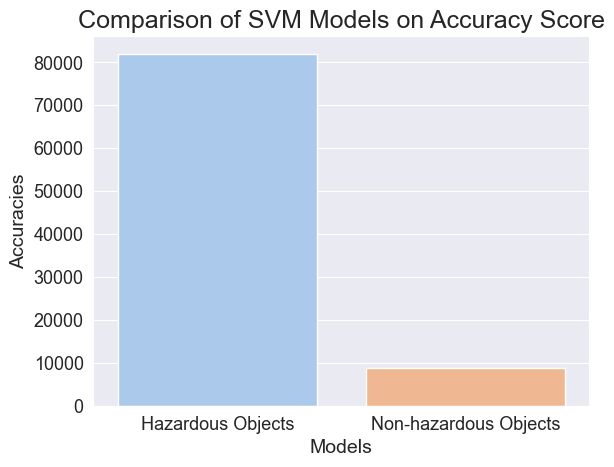

In [32]:
l1 = [falsePts,truePts]
x_labels = ["Hazardous Objects","Non-hazardous Objects"]

#using seaborn for visualisation of accuracies of different SVM Models
ax = sns.barplot(x=x_labels, y=l1, palette='pastel', ci=None)
ax.set(title='Comparison of SVM Models on Accuracy Score', xlabel='Models', ylabel='Accuracies')
plt.show()


    From the above plot, it can be seen that the False datapoints are > true datapoints.
So, there is a chance that out model might get biased towards False output.

I tried to synthetically upsample the minority class using SMOTE Technique,Undersampling the Majority Class, but the results were
unsatisfactory, so I continued with the original dataset which gave satisfactory results.

*Importing the important libraries for ML model building*

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.ensemble import AdaBoostClassifier

*ENCODING THE CATEGORICAL FEATURES IN THE DATASET*

In [34]:
lbl = LabelEncoder()

df['orbiting_body'] = lbl.fit_transform(df['orbiting_body'])
df['hazardous'] = lbl.fit_transform(df['hazardous'])
df['sentry_object'] = lbl.fit_transform(df['sentry_object'])

*Data Extraction*

In [35]:
#Creating new features from existing ones
df['new_feature'] = (df['est_diameter_max']/df['est_diameter_min'])*df['relative_velocity']

*Having a look at the Transformed dataframe*

In [36]:
df.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous,new_feature
0,2162635,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0,30341.763669
1,2277475,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,1,164549.395192
2,2512244,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,0,255490.202608
3,3596030,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,0,55374.665196
4,3667127,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,1,95564.477886


**Visualising the relation between all numerical features using Pairplot**

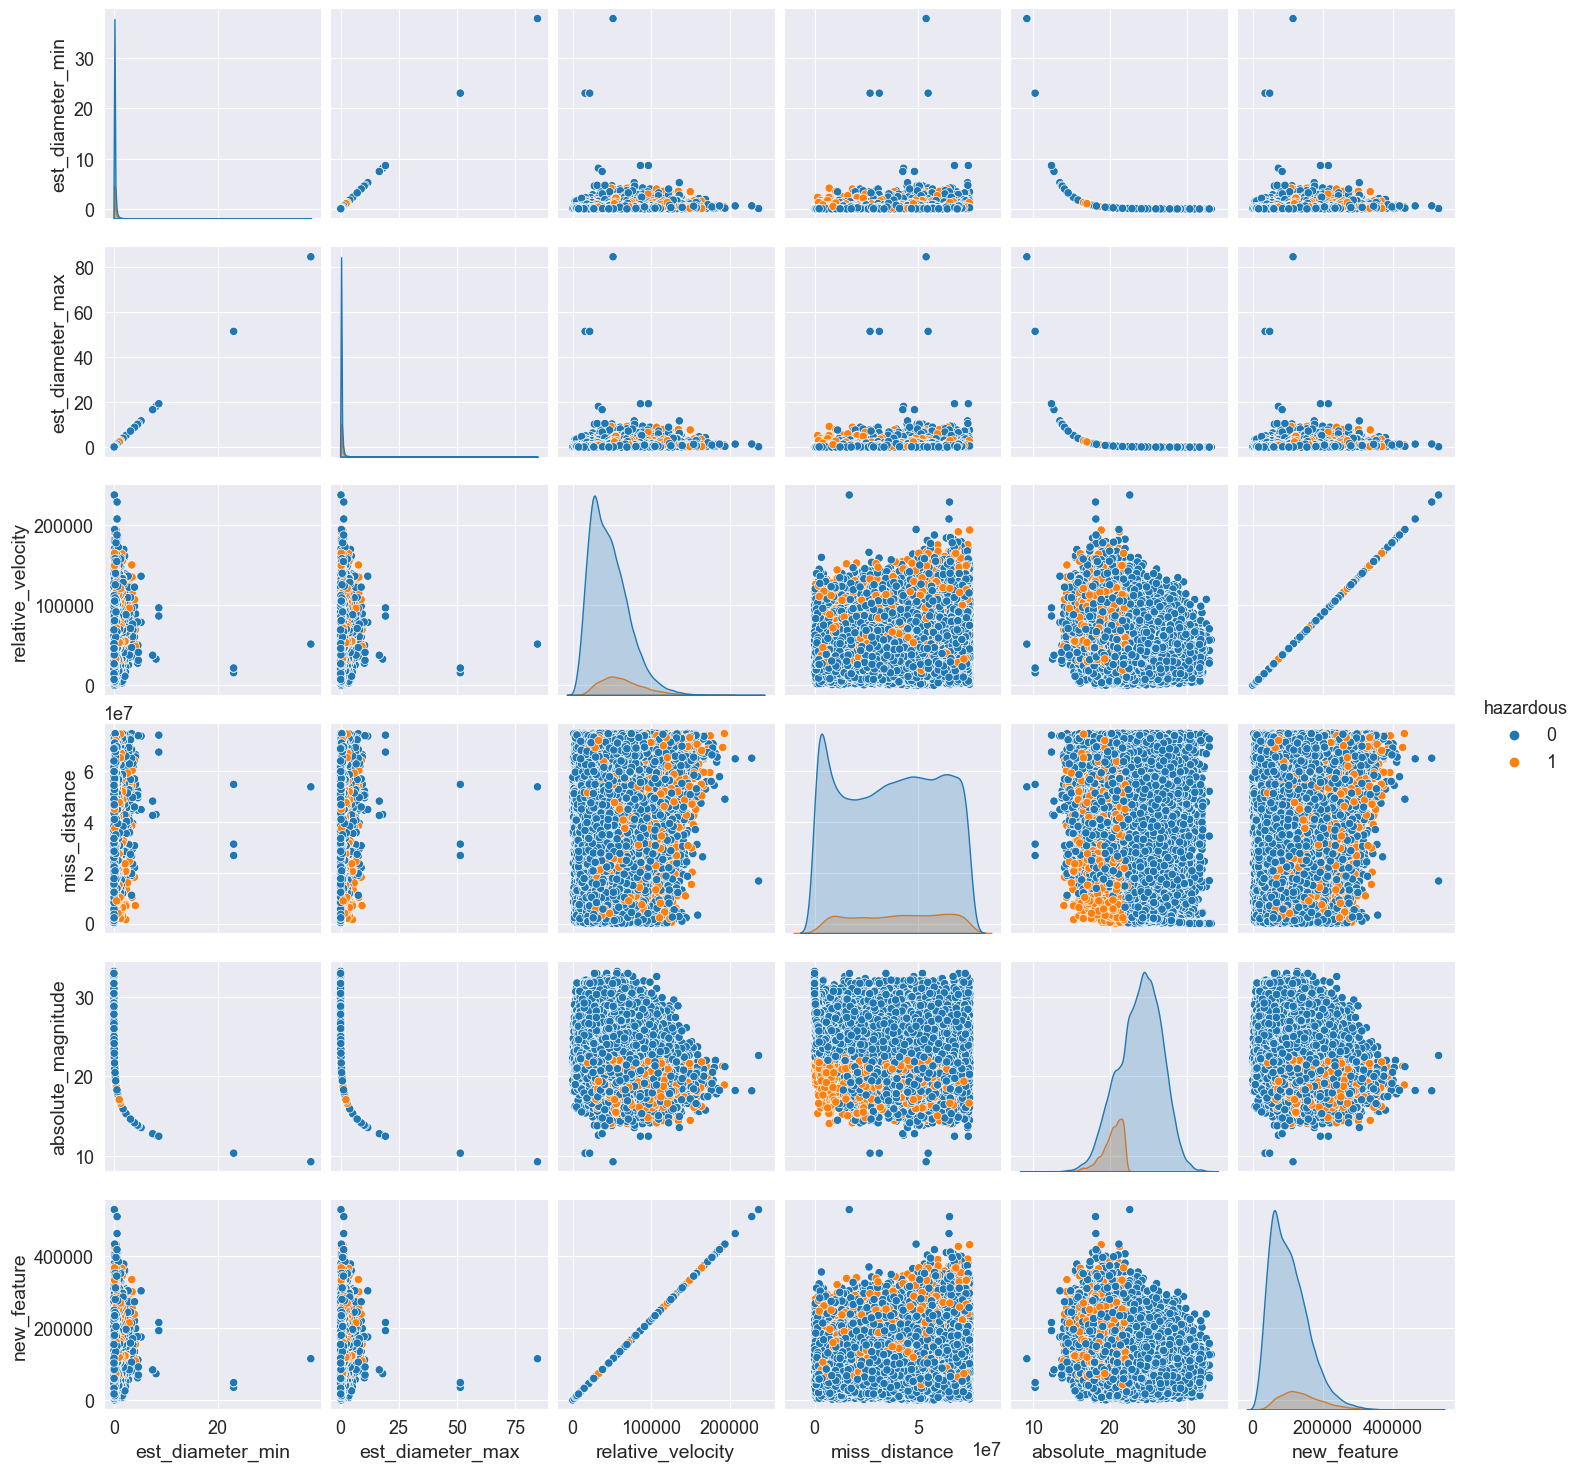

In [37]:

numerical_cols = []

for col in df.columns:
    if(df[col].dtype=='float64'):
        numerical_cols.append(col)
    
graph = sns.pairplot(df[numerical_cols+['hazardous']],hue = 'hazardous')

**HeatMap of the Dataset using heatmap function of seaborn**

This gives us the idea of how different features are related to each other and most 
importantly how they are related to the dependent feature i.e. whether that particular object is hazardous for the mankind or not.

<Axes: >

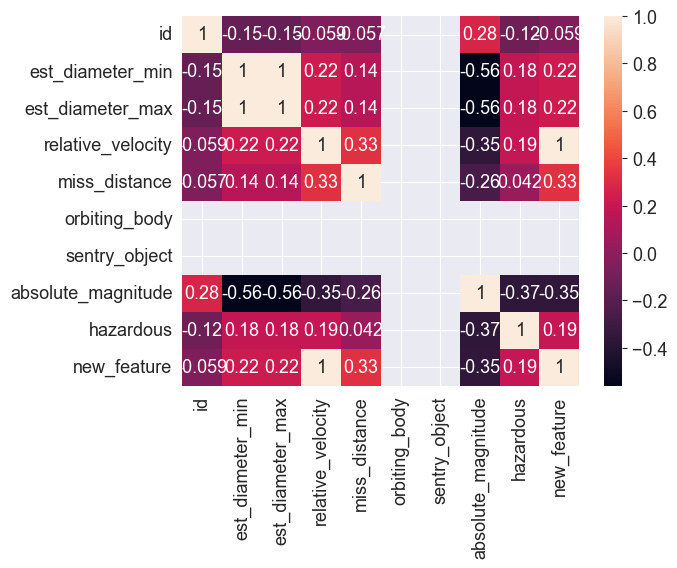

In [38]:
correl = df.corr()
sns.heatmap(correl,annot=True)

From the above heatmap, it is quite evitable that our prediction feature is having high correlation 
with the following features:
1. est_diameter_min		
2. est_diameter_max
3. relative_velocity
4. absolute_magnitude(negative correlation)


Separating the training and test data from the available dataset

In [39]:
x= df.drop(['hazardous'],axis=1)
y= df['hazardous']

X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.20, random_state=42)


In [40]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

print(len(X_train[0]))
print(X_train[0])


9
[-0.50559928 -0.30813982 -0.30813982  1.70103113  1.18327084  0.
  0.          0.2311184   1.70103113]


    *K-Neighbours Classifier*

In [41]:
k = np.sqrt(df.shape[0])
k

301.390112644725

In [42]:
knn = KNeighborsClassifier(n_neighbors= 110)
knn.fit(X_train,y_train)
y_predi = knn.predict(X_test)
score = accuracy_score(y_test,y_predi)
print("score: ", score*100)

score:  91.24284456186702


In [43]:

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_neighbors":[90,100,110,120],
    "weights":['uniform','distance'],
    'algorithm': ["auto",'kd_tree'],
    'leaf_size':[30,35]
}

knn = KNeighborsClassifier()
knn = RandomizedSearchCV(knn,param_distributions= param_grid)
knn.fit(X_train,y_train)
y_predi = knn.predict(X_test)
score = accuracy_score(y_test,y_predi)
print("score: ", score*100)

score:  91.48502862175253


    *Random Forest Classifier*

In [44]:
mdl = RandomForestClassifier(n_estimators=50)
mdl.fit(X_train,y_train)
y_predCV = mdl.predict(X_test)
score_RFC = accuracy_score(y_test,y_predCV)
prec_RFC= precision_score(y_test,y_predCV)
print("ACCURACY OF the RFC model is: "+ str(score_RFC *100)+ "%")
print("Precision of the RFC model is:  "+ str(prec_RFC*100)+"%")

ACCURACY OF the RFC model is: 94.94715984147952%
Precision of the RFC model is:  84.68776732249786%


In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[50],
    'criterion':['gini', 'entropy'],
    'max_depth':[7,8,9,10],
    'max_features':['sqrt', 'log2']
}

cv = GridSearchCV(RandomForestClassifier(),param_grid=param_grid,refit=True, cv = 4, verbose=0)

In [46]:
cv.fit(X_train,y_train)
y_predCV = cv.predict(X_test)
score_RFC_CV = accuracy_score(y_test,y_predCV)
prec_RFC_CV = precision_score(y_test,y_predCV)
print("ACCURACY OF the RFC model is: "+ str(score_RFC_CV *100)+ "%")
print("Precision of the RFC model is:  "+ str(prec_RFC*100)+"%")

ACCURACY OF the RFC model is: 92.51981505944518%
Precision of the RFC model is:  84.68776732249786%


In [47]:
model = AdaBoostClassifier(n_estimators= 75, random_state=2, algorithm='SAMME')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
scoreABC = accuracy_score(y_test,y_pred)
precscoreABC = precision_score(y_test,y_pred)
print("ACCURACY OF the RFC model is: "+ str(scoreABC *100)+ "%")
print("Precision of the RFC model is:  "+ str(precscoreABC*100)+"%")  


ACCURACY OF the RFC model is: 91.52906208718626%
Precision of the RFC model is:  78.6144578313253%


In [48]:
param_grid2 = {
    'n_estimators': [20,50,75,83],
    'random_state':[2,42,53]
}

model = AdaBoostClassifier(algorithm='SAMME')
modelGSV = RandomizedSearchCV(model,param_grid2)

modelGSV.fit(X_train,y_train)
y_predGSC = modelGSV.predict(X_test)
score3 = accuracy_score(y_test,y_predGSC)
precScore3 = precision_score(y_test,y_predGSC)
print("ACCURACY OF the RFC model is: "+ str(score3 *100)+ "%")
print("Precision of the RFC model is:  "+ str(precScore3*100)+"%") 

ACCURACY OF the RFC model is: 91.52906208718626%
Precision of the RFC model is:  78.6144578313253%


In [50]:
# print(model.feature_importances_)

***Support Vector Machines***

**Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.**

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a *hyperplane*.

Advantages of SVM :-
1. SVM is a robust algorithm as it can handle outliers efficienctly.
2. SVM can also work with linear data by using differnet kernels like linear, 
polynomial, gaussian, sigmoid, RBF etc.
3. SVM can be implemented for both classification and regression problems.

In [ ]:
#SVM with linear kernel
from sklearn.metrics import f1_score

svmModel = SVC(kernel='linear')

# fitting x samples and y classes 
svmModel.fit(X_train,y_train) 

y_pred_svm1 = svmModel.predict(X_test)
score_SVM1 = accuracy_score(y_test,y_pred_svm1)
f1_SVM1 = f1_score(y_test,y_pred_svm1)
precScore_SVM1 = precision_score(y_test,y_pred_svm1)
print("ACCURACY OF the RFC model is: "+ str(score_SVM1 *100)+ "%")
print("Precision of the RFC model is:  "+ str(precScore_SVM1*100)+"%") 


ACCURACY OF the RFC model is: 90.48326728313518%
Precision of the RFC model is:  0.0%


In [ ]:
#SVM with polynomial kernel
svmModel2 = SVC(kernel='poly')

# fitting x samples and y classes 
svmModel2.fit(X_train,y_train) 

y_pred_svm2= svmModel2.predict(X_test)
score_SVM2 = accuracy_score(y_test,y_pred_svm2)
precScore_SVM2 = precision_score(y_test,y_pred_svm2)
print("ACCURACY OF the RFC model is: "+ str(score_SVM2 *100)+ "%")
print("Precision of the RFC model is:  "+ str(precScore_SVM2*100)+"%") 

ACCURACY OF the RFC model is: 90.63738441215324%
Precision of the RFC model is:  93.75%


In [ ]:
#SVM with sigmoide kernel
svmModel3 = SVC(kernel='sigmoid')

# fitting x samples and y classes 
svmModel3.fit(X_train,y_train) 

y_pred_svm3= svmModel3.predict(X_test)
score_SVM3 = accuracy_score(y_test,y_pred_svm3)
precScore_SVM3 = precision_score(y_test,y_pred_svm3)
print("ACCURACY OF the RFC model is: "+ str(score_SVM3 *100)+ "%")
print("Precision of the RFC model is:  "+ str(precScore_SVM3*100)+"%") 

ACCURACY OF the RFC model is: 84.16446499339499%
Precision of the RFC model is:  17.789001122334454%


In [ ]:
#SVM with rbf kernel
svmModel4 = SVC(kernel='rbf')

# fitting x samples and y classes 
svmModel4.fit(X_train,y_train) 

y_pred_svm4 = svmModel4.predict(X_test)
score_SVM4 = accuracy_score(y_test,y_pred_svm3)
precScore_SVM4 = precision_score(y_test,y_pred_svm3)
print("ACCURACY OF the RFC model is: "+ str(score_SVM4 *100)+ "%")
print("Precision of the RFC model is:  "+ str(precScore_SVM4 *100)+"%") 

ACCURACY OF the RFC model is: 84.16446499339499%
Precision of the RFC model is:  17.789001122334454%


In [ ]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()
y_pred_xgbc=xgbc.fit(X_train,y_train).predict(X_test)

accXGB = accuracy_score(y_test,y_pred_xgbc)
precXGB = precision_score(y_test,y_pred_xgbc)
print("ACCURACY OF the RFC model is: "+ str(accXGB *100)+ "%")
print("Precision of the RFC model is:  "+ str(precXGB *100)+"%") 

print(confusion_matrix(y_test,y_pred_xgbc))

ACCURACY OF the RFC model is: 94.49031263760457%
Precision of the RFC model is:  89.13978494623656%
[[16338   101]
 [  900   829]]


In [ ]:

accuracies = [score_SVM1,score_SVM2,score_SVM3,score_SVM4]
precision_Scores = [precScore_SVM1,precScore_SVM2,precScore_SVM3,precScore_SVM4]

x_labels = ['Linear','Polynomial','Sigmoid','RBF']

**Setting up the backgroud so that data is visualised more clearly**

In [ ]:
sns.set_style('darkgrid')
plt.rc('axes', titlesize=18)   
plt.rc('axes', labelsize=14)   
plt.rc('xtick', labelsize=13)   
plt.rc('ytick', labelsize=13)   
plt.rc('legend', fontsize=13)   
plt.rc('font', size=13)  
sns.color_palette('pastel')
plt.figure(figsize=(3,3))


<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

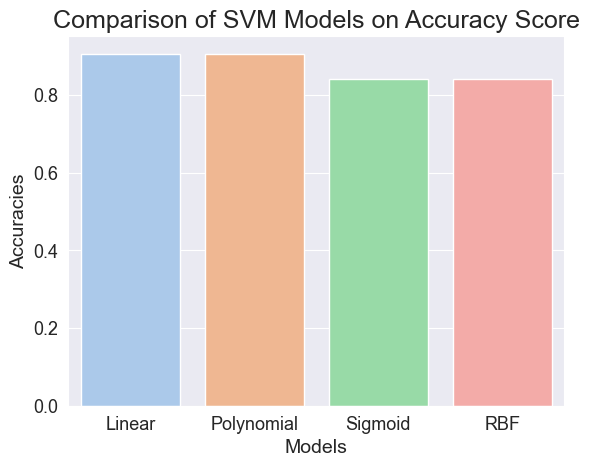

In [ ]:
#using seaborn for visualisation of accuracies of different SVM Models
ax = sns.barplot(x=x_labels, y=accuracies, palette='pastel', ci=None)
ax.set(title='Comparison of SVM Models on Accuracy Score', xlabel='Models', ylabel='Accuracies')
plt.show()

The bar plot reveals that the best SVM algorithm is the one using polynomial kernel, followed by 
the linear kernel and sigmoid kernel is performing the worst.

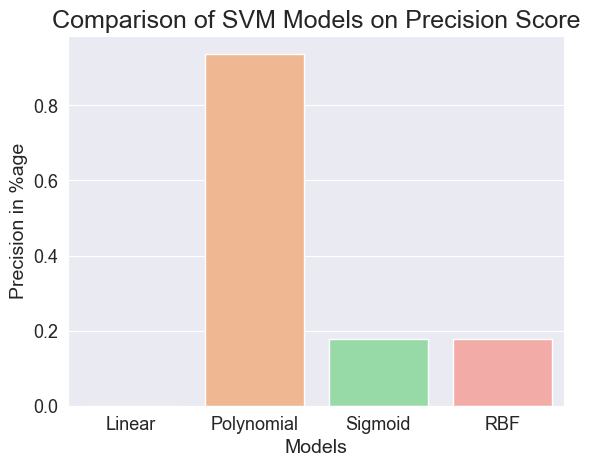

In [ ]:
plt.set_cmap("gist_rainbow")
ax = sns.barplot(x=x_labels, y=precision_Scores, palette='pastel', ci=None)
ax.set(title='Comparison of SVM Models on Precision Score', xlabel='Models', ylabel='Precision in %age')
plt.show()

As it can be interpreted from the above plot, as far as accuracy is concerned, the SVM model 
with polynomial kernel is performing the best with an accuracy score of 90.637384 % and 
as far as precision is concerned, the SVM model 
with polynomial kernel is again performing the best with an precision score of 93.3758 %.

***Comparison of all the algorithms used in this notebook***

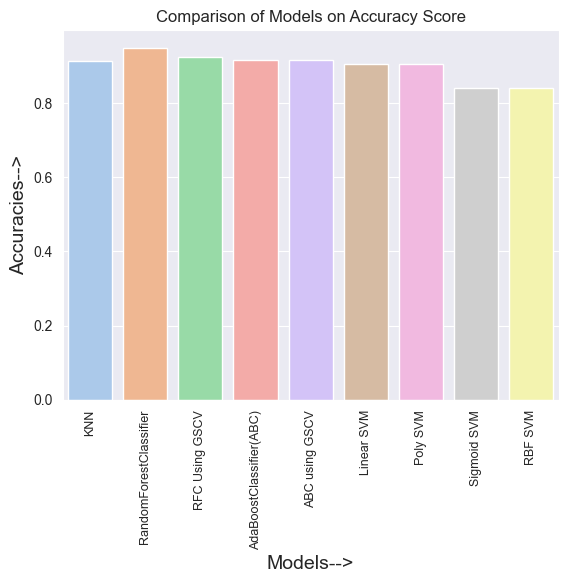

In [ ]:

accuraciesNew = [score,score_RFC,score_RFC_CV,scoreABC,score3,accXGB,
            score_SVM1,score_SVM2,score_SVM3,score_SVM4,]
#using seaborn for visualisation of accuracies of different Models incorporated

x_labels2 = ['KNN','RandomForestClassifier','RFC Using GSCV','AdaBoostClassifier(ABC)',
             'ABC using GSCV','XgBoost Classifier','Linear SVM','Poly SVM','Sigmoid SVM','RBF SVM']
plt.xticks(rotation=90,fontsize = 9)
plt.yticks(fontsize = 10)
ax = sns.barplot(x= x_labels2, y=accuraciesNew, palette='pastel', ci=None)
plt.title("Comparison of Models on Accuracy Score",fontsize=12)
ax.set(xlabel='Models-->', ylabel='Accuracies-->')
plt.show()


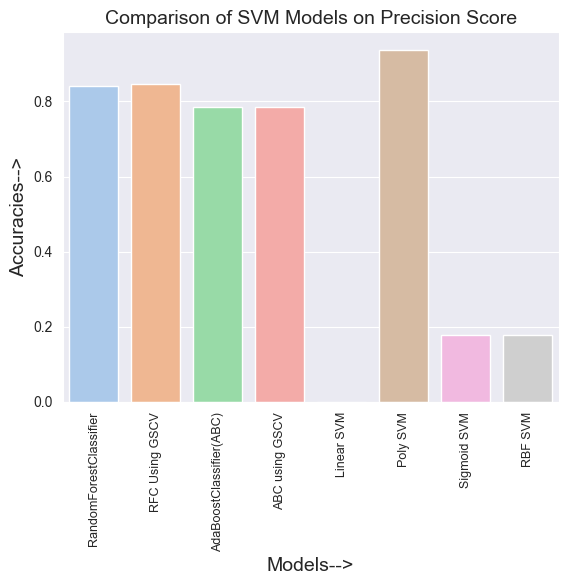

In [ ]:
precision_scoresNew = [prec_RFC,prec_RFC_CV,precscoreABC,precScore3,precXGB,
                precScore_SVM1,precScore_SVM2,precScore_SVM3,precScore_SVM4]
x_labels2 = ['RandomForestClassifier','RFC Using GSCV','AdaBoostClassifier(ABC)',
             'ABC using GSCV','XgBoost Classifier','Linear SVM','Poly SVM','Sigmoid SVM','RBF SVM']

plt.xticks(rotation=90,fontsize = 9)
plt.yticks(fontsize = 10)
ax = sns.barplot(x= x_labels2, y=precision_scoresNew, palette='pastel', ci=None)
plt.title("Comparison of SVM Models on Precision Score",fontsize=14)
ax.set( xlabel='Models-->', ylabel='Accuracies-->')
plt.show()

***From the bar plot, it can be interpreted that RandomForest Classifier performs the best with respect to
accuracy score and polynomial SVM performs the best with respect to precision score.***

In [ ]:
rfcAcc = np.round(score_RFC,4)*100
rfcPrec = np.round(prec_RFC,4)*100
polySVMAcc = np.round(score_SVM2,4)*100
polySVMprec = np.round(precScore_SVM2,4)*100

print("Accuracy score of RFC is: {} %and prec score is {} %".format(rfcAcc,rfcPrec))
print("Accuracy score of Polynomial kernel SVM is: {} % and prec score is {} %"
      .format(polySVMAcc,polySVMprec))

Accuracy score of RFC is: 94.89 %and prec score is 84.07 %
Accuracy score of Polynomial kernel SVM is: 90.64 % and prec score is 93.75 %


***So, the Support Vector Machines with Polynomial kernel 
performs the best for our problem statement.***

In [ ]:
finalModel = svmModel2

In [ ]:
import pickle
pickle.dump(finalModel,open('NearestObjects.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))


**In this notebook, our primary objective was to identify hazardous heavenly bodies around Earth using various machine learning models. We explored different algorithms, including Support Vector Machines (SVM) and other important models, to tackle this classification problem.**

**Throughout our analysis, we performed extensive data preprocessing, feature engineering, and model evaluation. We leveraged the power of SVM models, which are well-suited for complex classification tasks, and compared their performance with other prominent models.**

***Thank you very much judges, this concludes my notebook🥰 🙂***